In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
# create data, linear
weight = 1.0
bias = 0.6

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1) # data
y= weight * X + bias # target
# unsqueeze because using nn.Linear

In [3]:
# split the data 80 - 20
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split] # train data
X_test, y_test = X[split:], y[split:] # test data

In [4]:
def predictions(train_data,
                train_label,
                test_data,
                test_label,
                predictions=None):

  plt.figure(figsize=(10, 7)) # size of the plot

  # plot train data
  plt.scatter(train_data.cpu(), train_label.cpu(), s=5, c='blue', label='training data')

  # plot test data
  plt.scatter(test_data.cpu(), test_label.cpu(), s=5, c='green', label='test data')

  # plot prediction if not None
  if predictions != None:
    plt.scatter(test_data.cpu(), predictions.cpu(), s=5, c='red', label='prediction')

  plt.legend(prop={'size': 14}) # legend for the plot

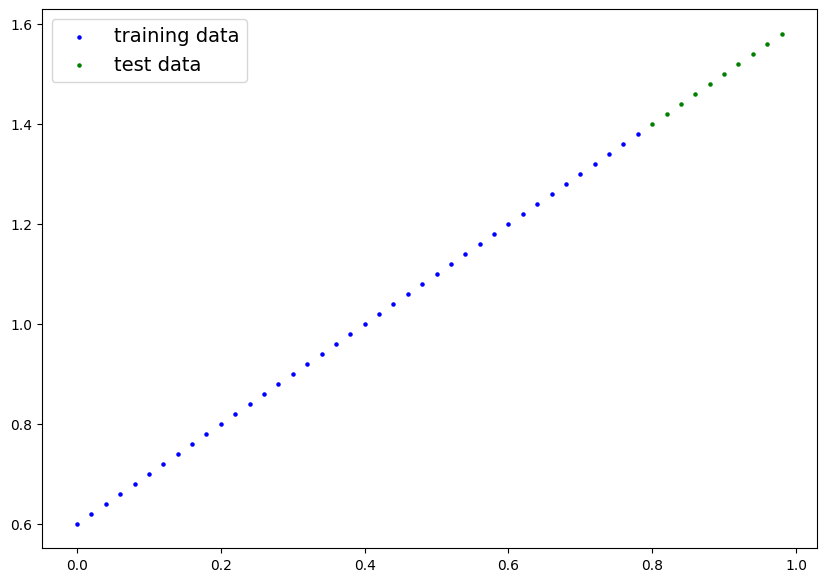

In [5]:
predictions(X_train, y_train, X_test, y_test)

In [6]:
# linear model
class modelReg(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features=1,
                            out_features=1)

  def forward(self, x):
    return self.linear(x)

model = modelReg()
model, model.state_dict()

(modelReg(
   (linear): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear.weight', tensor([[-0.4541]])),
              ('linear.bias', tensor([0.7756]))]))

In [7]:
# loss, optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)
loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [8]:
# set the data and model to gpu
device = 'cuda' if torch.cuda.is_available() else 'cpu'

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
model.to(device)

modelReg(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [9]:
# train
epochs = 300

for epoch in range(epochs):
  model.train() # set model to train mode

  # forward pass
  pred = model(X_train)

  # calculate loss
  loss = loss_fn(pred, y_train)

  # set gradient to zero
  optimizer.zero_grad()

  # getting the gradients
  loss.backward()

  # step optimization
  optimizer.step()

  if epoch % 40 == 0:
    model.eval() # set model to evaluation mode
    with torch.inference_mode():
      tst_pred = model(X_test)
      tst_loss = loss_fn(tst_pred, y_test)
  if epoch % 50 == 0:
    print(f'epoch: {epoch} | train loss: {loss} | test loss: {tst_loss}')

epoch: 0 | train loss: 0.42243286967277527 | test loss: 1.108770489692688
epoch: 50 | train loss: 0.2709348201751709 | test loss: 0.8068042993545532
epoch: 100 | train loss: 0.23416674137115479 | test loss: 0.6456549167633057
epoch: 150 | train loss: 0.2151293307542801 | test loss: 0.5597531199455261
epoch: 200 | train loss: 0.19767943024635315 | test loss: 0.4654885232448578
epoch: 250 | train loss: 0.18042533099651337 | test loss: 0.4289640486240387


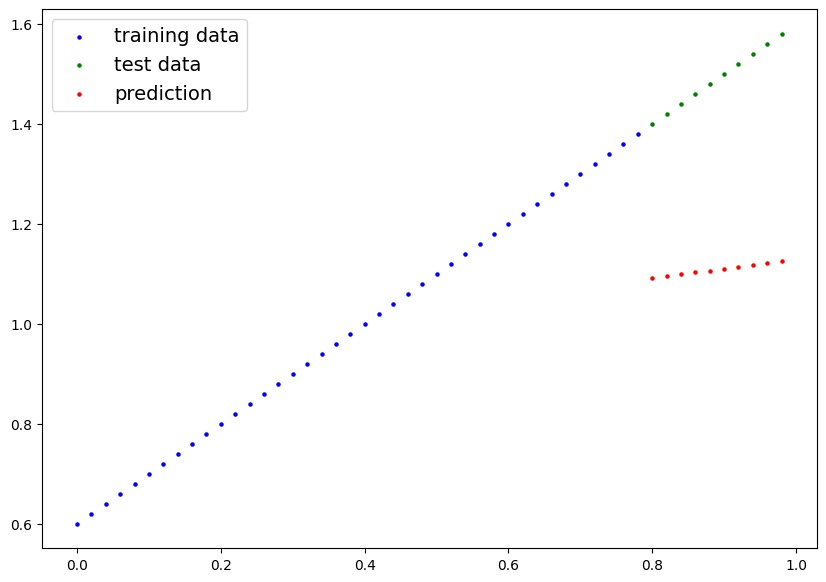

In [10]:
# create prediction using test data and plot it
model.eval()
with torch.inference_mode():
  tst_pred = model(X_test)

predictions(X_train, y_train, X_test, y_test, tst_pred)

In [11]:
# save the model
from pathlib import Path

model_name = 'reg_model.pth'
model_path = Path()
model_save_path = model_path/model_name

print(f'saving model: {model_name}')
torch.save(obj=model.state_dict(),
           f=model_save_path)

saving model: reg_model.pth


In [12]:
# load the model to check the pretrained weights
model_1 = modelReg() # create an instance
model_1.load_state_dict(torch.load(model_save_path)) # load pretrained weigth

<All keys matched successfully>

In [13]:
# check for predictions with the latest prediction before saving the model
model_1.eval()
model_1.to(device)
with torch.inference_mode():
  npred = model_1(X_test)
npred == tst_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')